In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


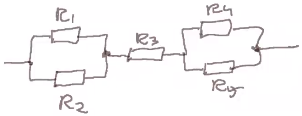

In [41]:
from pulp import *
#print(pulp.__version__)

prob = LpProblem("Maksymalizacja_pradu_w_ukladzie",LpMaximize)

i1=LpVariable("i1",0,None,LpContinuous)
i2=LpVariable("i2",0,None,LpContinuous)
i3=LpVariable("i3",0,None,LpContinuous)
i4=LpVariable("i4",0,None,LpContinuous)
i5=LpVariable("i5",0,None,LpContinuous)

R = [8,6,4,10,8]

i = i3 #prad w ukladzie

prob += i

prob += i1 + i2 == i3 #kirchhoff
prob += i4 + i5 == i3 #kirchhoff

#ograniczenia pradow
prob += i1 <= 2
prob += i2 <= 3
prob += i3 <= 4
prob += i4 <= 2
prob += i5 <= 2

prob.writeLP("rezo.lp")
prob.solve()

varsdict = {}

j = 0
for v in prob.variables():
    varsdict[v.name,"u"+str(j+1)] = str(v.varValue), v.varValue*R[j]
    j += 1

#!cat "rezo.lp"

print("Status:", LpStatus[prob.status])
print("Max prąd {}A, prądy [A] i napięcia [V]: {}".format(value(prob.objective),varsdict))

Status: Optimal
Max prąd 4.0A, prądy [A] i napięcia [V]: {('i1', 'u1'): ('1.0', 8.0), ('i2', 'u2'): ('3.0', 18.0), ('i3', 'u3'): ('4.0', 16.0), ('i4', 'u4'): ('2.0', 20.0), ('i5', 'u5'): ('2.0', 16.0)}
